In [522]:
# cmd to run local test from terminal is: julia localtest.jl
# import Pkg
# Pkg.add("Distributions")

In [523]:
using Plots
using Distributions
gr()
include("Project2_jl/helpers.jl")
include("Project2_jl/project2.jl")
include("Project2_jl/simple.jl")

simple3_init (generic function with 1 method)

The two methods for adhering to constraints are 1. quadratic penalty method 2. the interior point method (using the quadratic penaltiy to find a feasible point prior to starting interior-point method)

In project 1, I used a sover relient upon a gradient of the objective function. In this case where the objective function changes based on constraints and the neew gradient is not provided, it makes sense to pursue a gradient-free approach. Therefore, I will implement a CMA solver to use for both contraint methods.



In [524]:
# main("simple1", 5, optimize)
# D = Normal(1.0, 2.0)
# mean(D)
# var(D)
# std(D)
# stdM = Matrix(2.0*I, 3, 3)
# a = [0, 1, -1]
# sum(x->x>0, a) 
# p = x-> sum(x->x>0)
x0 = [2, 2]
c = x -> [x[1] + x[2]^2 - 1, -x[1] - x[2]]
rho_quad = 2

c_x = c(x0)
count_penalty = sum( y -> y > 0, x0 )

#test penalty function, p, with simpl1 constraint function, c.
# pen = p_quad(x0)
# p = x -> sum( x-> x>0, c(x) )
# dim_c_out = length(c(x0))
# display(c(x0))

# function p_quadratic(c, x)
#     penalty = 0
#     for i in 1:length(x)
# #         c_i = c(x)
#         penalty = penalty + maximum([c(x)[i], 0])^2
#     end
#     return penalty
# end

# p_quadratic(c,x0)
# maximum([c(x0)[1], 0])^2
# maximum([c(x0)[1], 0])^2
# maximum([x0; zeros(length(x0),1)],2)
# p_quad = x -> sum( x -> c(x),0)
# p_quad(x0)

#proper multivariate distribution syntax
# x0 = [0; 0]
# mu = x0
# scale = 1.0
# stdM = Matrix(scale*I, length(x0), length(x0))
# D = MvNormal(mu, stdM)
# mun = mean(D)

2

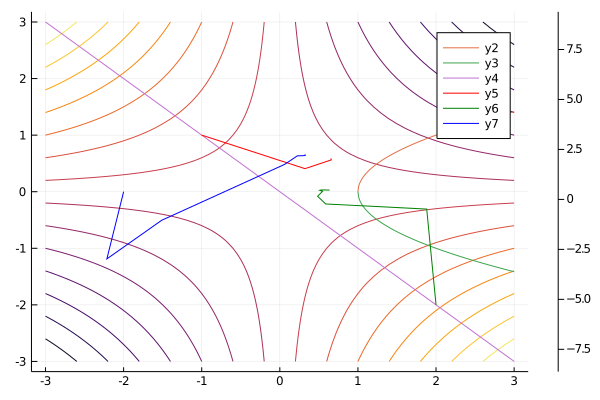

In [525]:
prob1_fun(x...) = simple1(collect(x))
# prob1_constr(x...) = simple1_constraints(collect(x))
# s1_c1 = x -> -x^2 + 1 #pass in x2, output x1
s1_c1a = x -> (abs(-x + 1))^(0.5)
s1_c1b = x -> -(abs(-x + 1))^(0.5) #pass in x1, output x2
s1_c2 = x -> -x #pass in x1, output x1
rng = 3
res = 0.1
x = -rng:res:rng
y = -rng:res:rng
plot(x, y, prob1_fun, st = :contour, levels = [0 1], xlims = [-3,3], ylims = [-3, 3])
plot!(1:0.01:3, s1_c1a)
plot!(1:0.01:3, s1_c1b)
plot!(x, s1_c2)

# x0 = [3,-3]
nEvalLim = 2000
empty!(COUNTERS)
x_hist = optimize_history(simple1, simple1_gradient, simple1_constraints, [-1, 1], nEvalLim, "simple1")
x_hist_coll = hcat(x_hist...)';
plot!(x_hist_coll[:,1], x_hist_coll[:,2], c = :red) 

empty!(COUNTERS)
x_hist = optimize_history(simple1, simple1_gradient, simple1_constraints, [2,-2], nEvalLim, "simple1")
x_hist_col2 = hcat(x_hist...)';
plot!(x_hist_col2[:,1], x_hist_col2[:,2], c = :green) 

empty!(COUNTERS)
x_hist = optimize_history(simple1, simple1_gradient, simple1_constraints, [-2, 0], nEvalLim, "simple1")
x_hist_col3 = hcat(x_hist...)';
plot!(x_hist_col3[:,1], x_hist_col3[:,2], c = :blue) 

# println(simple1_constraints(x_best))
# scatter!([x_best[1]], [x_best[2]])

# sc, nevals, mus = main("simple2", 1, optimize)

# println("neevals")
# println(nevals)
# mu_x = zeros(length(mus),1)
# mu_y = zeros(length(mus),1)
# for i in 1:length(mus)
#     mu_x[i] = mus[i][1]
#     mu_y[i] = mus[i][2]
# #     scatter!( [mu_x[i]], [mu_y[i]])
# end
# # println(mus)
# # println(mu_y)
# # scatter!(mus[1])
# # scatter!( [mu_x[1]], [mu_y[1]])
# plot!(x, y, prob_fun, st = :contour, levels = [0 1])

In [526]:
# savefig("simple1_mix_penalty_cross_entropy.png")

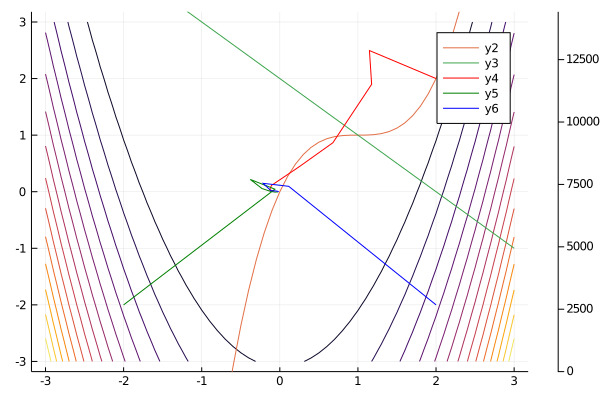

In [527]:
prob2_fun(x...) = simple2(collect(x))
# prob1_constr(x...) = simple1_constraints(collect(x))
s2_c1 = x -> (x-1)^3 + 1 #pass in x1, output x2
s2_c2 = x -> -x + 2 #pass in x1, output x2
rng = 3
res = 0.1
x = -rng:res:rng
y = -rng:res:rng
plot(x, y, prob2_fun, st = :contour, levels = [0 1], xlims = [-3,3], ylims = [-3, 3])
plot!(y, s2_c1)
plot!(y, s2_c2)

# x0 = [3,-3]
nEvalLim = 2000
empty!(COUNTERS)
x_hist = optimize_history(simple2, simple2_gradient, simple2_constraints, [2, 2], nEvalLim, "simple2")
x_hist_coll = hcat(x_hist...)';
plot!(x_hist_coll[:,1], x_hist_coll[:,2], c = :red) 

empty!(COUNTERS)
x_hist = optimize_history(simple2, simple2_gradient, simple2_constraints, [-2, -2], nEvalLim, "simple2")
x_hist_col2 = hcat(x_hist...)';
plot!(x_hist_col2[:,1], x_hist_col2[:,2], c = :green) 

empty!(COUNTERS)
x_hist = optimize_history(simple2, simple2_gradient, simple2_constraints, [2, -2], nEvalLim, "simple2")
x_hist_col3 = hcat(x_hist...)';
plot!(x_hist_col3[:,1], x_hist_col3[:,2], c = :blue) 


In [528]:
# savefig("simple2_mix_penalty_cross_entropy.png")

In [529]:
# sc, nevals, mus = main("simple2", 5, optimize)

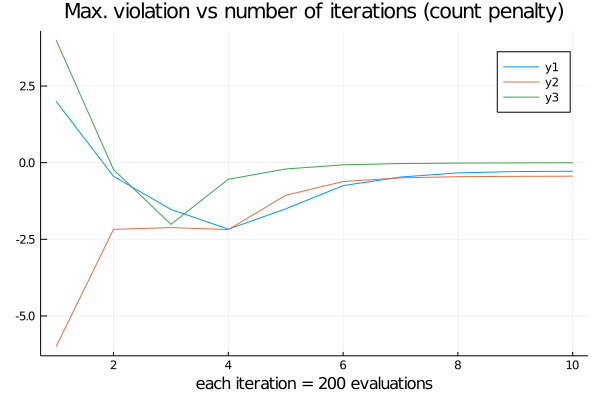

In [530]:
p = x -> maximum(simple2_constraints(x))
empty!(COUNTERS)
x_hist = optimize_history(simple2, simple2_gradient, simple2_constraints, [2, 2], nEvalLim, "simple2")
plot(p.(x_hist))

empty!(COUNTERS)
x_hist = optimize_history(simple2, simple2_gradient, simple2_constraints, [-2, -2], nEvalLim, "simple2")
plot!(p.(x_hist))

empty!(COUNTERS)
x_hist = optimize_history(simple2, simple2_gradient, simple2_constraints, [2, -2], nEvalLim, "simple2")
plot!(p.(x_hist))
title!("Max. violation vs number of iterations (count penalty)")
xlabel!("each iteration = 200 evaluations")

In [531]:
# savefig("max_violation_iter_simple2_count.png")

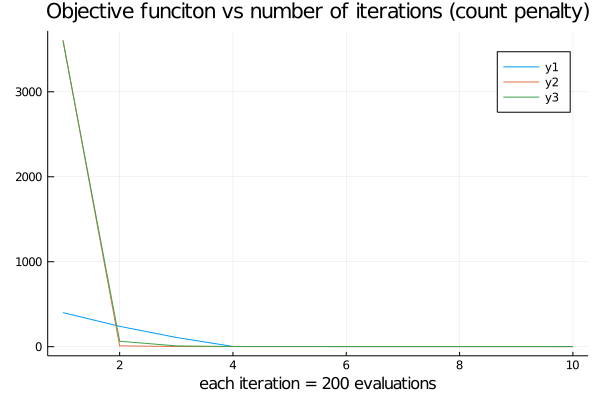

In [532]:
empty!(COUNTERS)
x_hist = optimize_history(simple2, simple2_gradient, simple2_constraints, [2, 2], nEvalLim, "simple2")
plot(simple2.(x_hist))

empty!(COUNTERS)
x_hist = optimize_history(simple2, simple2_gradient, simple2_constraints, [-2, -2], nEvalLim, "simple2")
plot!(simple2.(x_hist))

empty!(COUNTERS)
x_hist = optimize_history(simple2, simple2_gradient, simple2_constraints, [2, -2], nEvalLim, "simple2")
plot!(simple2.(x_hist))
title!("Objective funciton vs number of iterations (count penalty)")
xlabel!("each iteration = 200 evaluations")

In [533]:
# savefig("objective_iter_simple2_count.png")